In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
words = open("names.txt", "r").read().split()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
chars=sorted(list(set(''.join(words))))
stoi = {c:i+1 for i , c in enumerate(chars)}
stoi['.']=0
itos={i:s for s,i in stoi.items()}
print(stoi)
print(itos)



{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
block_size = 3 # context length: how many characters to take to predict the next character
X,Y=[],[]
for w in words[:5]:
    print(w)
    context=[0]*block_size # Creates an initial context of [0, 0, 0]. This serves as the starting context before actual characters from the word are added. Assuming 0 is a special padding token
    for ch in w + '.':# Iterate through each character in the word plus a stopping character ('.')
        ix =stoi[ch] # Convert character to its integer index using a predefined `stoi` dictionary
        X.append(context)
        Y.append(ix)
        print(X,Y)
        print(''.join(itos[i] for i in context),'---->',itos[ix])# Print the mapping from context to predicted character
        context=context[1:]+[ix] # Shift the context window by removing the first character and appending the new one
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
[[0, 0, 0]] [5]
... ----> e
[[0, 0, 0], [0, 0, 5]] [5, 13]
..e ----> m
[[0, 0, 0], [0, 0, 5], [0, 5, 13]] [5, 13, 13]
.em ----> m
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13]] [5, 13, 13, 1]
emm ----> a
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1]] [5, 13, 13, 1, 0]
mma ----> .
olivia
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0]] [5, 13, 13, 1, 0, 15]
... ----> o
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0], [0, 0, 15]] [5, 13, 13, 1, 0, 15, 12]
..o ----> l
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0], [0, 0, 15], [0, 15, 12]] [5, 13, 13, 1, 0, 15, 12, 9]
.ol ----> i
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0], [0, 0, 15], [0, 15, 12], [15, 12, 9]] [5, 13, 13, 1, 0, 15, 12, 9, 22]
oli ----> v
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0], [0, 0, 15], [0, 15, 12], [15, 12, 9], [12, 9, 22]] [5, 13, 13, 1, 0, 15, 12, 9, 22, 9]
liv ----> i


In [5]:
X.shape,Y.shape


(torch.Size([32, 3]), torch.Size([32]))

In [6]:
X,Y

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [7]:
C= torch.randn((27,2))

In [8]:
#F.one_hot(torch.tensor(5),num_classes=27).float() @ C

In [9]:
e

NameError: name 'e' is not defined

In [ ]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1=torch.randn(6,100)
b1=torch.randn(100)
emb @ W1 + b1


In [ ]:
torch.flatten(emb,start_dim=1,end_dim=2).shape

torch.Size([32, 6])

In [ ]:
# Function of torch.cat
'''x = torch.randn(2, 3)
print(x)
print(torch.cat((x,x,x),0))
print(torch.cat((x,x),1))
#print(torch.cat((x,x,x),2))'''

tensor([[ 0.0079, -0.0464, -1.6455],
        [-0.4411,  1.0999,  0.4642]])
tensor([[ 0.0079, -0.0464, -1.6455],
        [-0.4411,  1.0999,  0.4642],
        [ 0.0079, -0.0464, -1.6455],
        [-0.4411,  1.0999,  0.4642],
        [ 0.0079, -0.0464, -1.6455],
        [-0.4411,  1.0999,  0.4642]])
tensor([[ 0.0079, -0.0464, -1.6455,  0.0079, -0.0464, -1.6455],
        [-0.4411,  1.0999,  0.4642, -0.4411,  1.0999,  0.4642]])


In [ ]:
C[X]

tensor([[[-1.3949,  0.5145],
         [-1.3949,  0.5145],
         [-1.3949,  0.5145]],

        [[-1.3949,  0.5145],
         [-1.3949,  0.5145],
         [ 0.0546,  2.4548]],

        [[-1.3949,  0.5145],
         [ 0.0546,  2.4548],
         [-0.1514, -1.2279]],

        [[ 0.0546,  2.4548],
         [-0.1514, -1.2279],
         [-0.1514, -1.2279]],

        [[-0.1514, -1.2279],
         [-0.1514, -1.2279],
         [ 0.8285,  1.4391]],

        [[-1.3949,  0.5145],
         [-1.3949,  0.5145],
         [-1.3949,  0.5145]],

        [[-1.3949,  0.5145],
         [-1.3949,  0.5145],
         [-0.5391,  0.4790]],

        [[-1.3949,  0.5145],
         [-0.5391,  0.4790],
         [ 0.1167, -0.8259]],

        [[-0.5391,  0.4790],
         [ 0.1167, -0.8259],
         [-0.7695,  0.2704]],

        [[ 0.1167, -0.8259],
         [-0.7695,  0.2704],
         [-0.1459, -1.3000]],

        [[-0.7695,  0.2704],
         [-0.1459, -1.3000],
         [-0.7695,  0.2704]],

        [[-0.1459, -1

#### Now we need to find a way to take the embedding first character of each trigram and form an array that is do this:
 [-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],

 [ 0.0546,  2.4548, -0.1514, -1.2279, -1.3949,  0.5145]
  
 etc 
 
 because the nueral layer is of size (6,100) and the embedding is of size(32,3,2) some how we have to make it (32,6) feed it to the neural layer so to do that there are three ways:

In [ ]:
torch.flatten(emb,start_dim=1,end_dim=2).shape

torch.Size([32, 6])

In [ ]:
#Take out the first dimension of the each embedding of a trigram by using unbinding
torch.cat(torch.unbind(emb,1),1)#inefficient

In [ ]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],dim=1)# unefficient aas creates new tensor to concatenate the values because there is no way to concatenate with using views

tensor([[-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],
        [-1.3949,  0.5145, -1.3949,  0.5145,  0.0546,  2.4548],
        [-1.3949,  0.5145,  0.0546,  2.4548, -0.1514, -1.2279],
        [ 0.0546,  2.4548, -0.1514, -1.2279, -0.1514, -1.2279],
        [-0.1514, -1.2279, -0.1514, -1.2279,  0.8285,  1.4391],
        [-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],
        [-1.3949,  0.5145, -1.3949,  0.5145, -0.5391,  0.4790],
        [-1.3949,  0.5145, -0.5391,  0.4790,  0.1167, -0.8259],
        [-0.5391,  0.4790,  0.1167, -0.8259, -0.7695,  0.2704],
        [ 0.1167, -0.8259, -0.7695,  0.2704, -0.1459, -1.3000],
        [-0.7695,  0.2704, -0.1459, -1.3000, -0.7695,  0.2704],
        [-0.1459, -1.3000, -0.7695,  0.2704,  0.8285,  1.4391],
        [-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],
        [-1.3949,  0.5145, -1.3949,  0.5145,  0.8285,  1.4391],
        [-1.3949,  0.5145,  0.8285,  1.4391, -0.1459, -1.3000],
        [ 0.8285,  1.4391, -0.1459, -1.3

In [ ]:
##Working of torch.unbind
a=torch.randn(2,3,2)
print(a)
torch.unbind(a,dim=2)

tensor([[[-0.0377, -0.0330],
         [-1.5238, -1.3840],
         [ 0.9075,  1.4327]],

        [[ 0.0604, -0.8923],
         [-0.3241,  1.6402],
         [-0.3417,  1.2738]]])


(tensor([[-0.0377, -1.5238,  0.9075],
         [ 0.0604, -0.3241, -0.3417]]),
 tensor([[-0.0330, -1.3840,  1.4327],
         [-0.8923,  1.6402,  1.2738]]))

In [ ]:
a=torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.view(2,9)
a.view(2,3,3)
a.view(9,2)


tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [ ]:
### Why does this work ?
a.storage()# Number always as a one dimension vector

C:\Users\rohan\AppData\Local\Temp\ipykernel_13376\967240405.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.view(32,6)

tensor([[-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],
        [-1.3949,  0.5145, -1.3949,  0.5145,  0.0546,  2.4548],
        [-1.3949,  0.5145,  0.0546,  2.4548, -0.1514, -1.2279],
        [ 0.0546,  2.4548, -0.1514, -1.2279, -0.1514, -1.2279],
        [-0.1514, -1.2279, -0.1514, -1.2279,  0.8285,  1.4391],
        [-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],
        [-1.3949,  0.5145, -1.3949,  0.5145, -0.5391,  0.4790],
        [-1.3949,  0.5145, -0.5391,  0.4790,  0.1167, -0.8259],
        [-0.5391,  0.4790,  0.1167, -0.8259, -0.7695,  0.2704],
        [ 0.1167, -0.8259, -0.7695,  0.2704, -0.1459, -1.3000],
        [-0.7695,  0.2704, -0.1459, -1.3000, -0.7695,  0.2704],
        [-0.1459, -1.3000, -0.7695,  0.2704,  0.8285,  1.4391],
        [-1.3949,  0.5145, -1.3949,  0.5145, -1.3949,  0.5145],
        [-1.3949,  0.5145, -1.3949,  0.5145,  0.8285,  1.4391],
        [-1.3949,  0.5145,  0.8285,  1.4391, -0.1459, -1.3000],
        [ 0.8285,  1.4391, -0.1459, -1.3

In [ ]:
W1=torch.randn(6,100)
b1=torch.randn(100)
h=torch.tanh(emb.view(-1,6) @ W1+b1)


In [ ]:
h# nos between -1 and 1 because of tanh


tensor([[-1.0000, -0.9995, -0.0350,  ..., -0.9982, -0.9996, -0.9998],
        [-1.0000, -0.9614, -0.4546,  ..., -0.9965, -1.0000, -1.0000],
        [ 0.9987, -0.9997, -0.4110,  ..., -0.9751, -0.9949,  0.5634],
        ...,
        [ 0.9969, -0.9724, -0.1110,  ..., -0.3865, -0.9794,  0.3704],
        [ 0.0831, -0.9881,  0.3437,  ...,  0.2040, -0.9669, -0.5715],
        [-0.9530,  0.9241,  0.3901,  ..., -0.9862, -0.9713, -0.9972]])

In [ ]:
W2=torch.randn(100,27)
b2=torch.randn(27)
logits= h @ W2+b2


In [ ]:
counts=logits.exp()
probs=counts/counts.sum(1,keepdim=True)

In [ ]:
nll=-probs[torch.arange(32),Y].log().mean()
nll

tensor(15.3648)

### Making it one place

In [10]:
block_size = 3 # context length: how many characters to take to predict the next character
X,Y=[],[]
for w in words:
    #print(w)
    context=[0]*block_size # Creates an initial context of [0, 0, 0]. This serves as the starting context before actual characters from the word are added. Assuming 0 is a special padding token
    for ch in w + '.':# Iterate through each character in the word plus a stopping character ('.')
        ix =stoi[ch] # Convert character to its integer index using a predefined `stoi` dictionary
        X.append(context)
        Y.append(ix)
        #print(X,Y)
        #print(''.join(itos[i] for i in context),'---->',itos[ix])# Print the mapping from context to predicted character
        context=context[1:]+[ix] # Shift the context window by removing the first character and appending the new one
X = torch.tensor(X)
Y = torch.tensor(Y)

In [93]:
# Training split , validation split, test split
def build_dataset(words):
 block_size = 5 # context length: how many characters to take to predict the next character
 X,Y=[],[]
 for w in words:
    #print(w)
    context=[0]*block_size # Creates an initial context of [0, 0, 0]. This serves as the starting context before actual characters from the word are added. Assuming 0 is a special padding token
    for ch in w + '.':# Iterate through each character in the word plus a stopping character ('.')
        ix =stoi[ch] # Convert character to its integer index using a predefined `stoi` dictionary
        X.append(context)
        Y.append(ix)
        #print(X,Y)
        #print(''.join(itos[i] for i in context),'---->',itos[ix])# Print the mapping from context to predicted character
        context=context[1:]+[ix] # Shift the context window by removing the first character and appending the new one
 X = torch.tensor(X)
 Y = torch.tensor(Y)
 print(X.shape,Y.shape)
 return X,Y
import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))
Xtr,Ytr=build_dataset(words[:n1])
Xdev,Ydev=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])


torch.Size([182441, 5]) torch.Size([182441])
torch.Size([22902, 5]) torch.Size([22902])
torch.Size([22803, 5]) torch.Size([22803])


In [94]:

Xtr.shape,Ytr.shape

(torch.Size([182441, 5]), torch.Size([182441]))

In [95]:
g= torch.Generator().manual_seed(42)
C=torch.randn((27,10),generator=g)
W1=torch.randn((30,200),generator=g)
b1=torch.randn(200,generator=g)
W2=torch.randn((200,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]



In [96]:
sum(p.nelement() for p in parameters)


11897

In [97]:
for p in parameters:
    p.requires_grad=True

In [98]:
X.shape[0]

228146

In [99]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre


In [100]:
lri=[]
lossi=[]
stepi=[]

In [102]:
emb.shape

torch.Size([32, 5, 10])

In [101]:

for i in range(50000):
 # minibatch construct

 ix=torch.randint(0,Xtr.shape[0],(32,))

 emb=C[Xtr[ix]]
 h=torch.tanh(emb.view(-1,30)@ W1+b1)
 logits=h @ W2+b2
 '''counts=logits.exp()
probs=counts/counts.sum(1,keepdim=True)
loss=-probs[torch.arange(32),Y].log().mean()'''
# This was done for educational purposes only why ? Because the earlier we were using extra space to do those operations but pytorch inbuilt functions use fused kernels to calculate the result in an efficient manner
# The backward pass will also be efficient because mathematically its often simpler backward pass to integrate
# Under the hood the Cross Entropy might be more  numerically stable  of offset by pytorch check umar jamils video on vaision transformer he explains the problem with cross entropy and softmax
 loss=F.cross_entropy(logits,Ytr[ix])#
 #print(loss.item())
#backward pass
 for p in parameters:
    p.grad=None
 loss.backward()
#update
 lr=0.1
 for p in parameters:
   p.data+=-lr* p.grad
 
 #lri.append(lre[i])
 stepi.append(i)
 lossi.append(loss.log10().item())
print(loss.item())

RuntimeError: shape '[-1, 30]' is invalid for input of size 1600

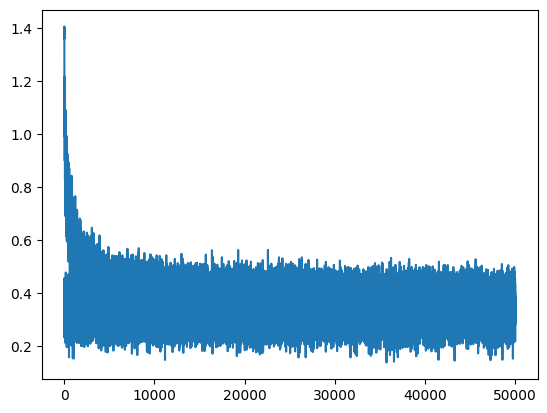

In [72]:
plt.plot(stepi,lossi)

In [76]:
emb=C[Xtr]
h=torch.tanh(emb.view(-1,30)@ W1+b1)
logits=h @ W2+b2
loss=F.cross_entropy(logits,Ytr)
loss


tensor(2.1492, grad_fn=<NllLossBackward0>)

In [77]:
emb=C[Xdev]
h=torch.tanh(emb.view(-1,30)@ W1+b1)
logits=h @ W2+b2
loss=F.cross_entropy(logits,Ydev)
loss


tensor(2.1728, grad_fn=<NllLossBackward0>)

In [ ]:
'''#logits=torch.tensor([-100,-3,0,5])
#logits=torch.tensor([-2,-3,0,5])
logits=torch.tensor([-100,-3,0,100])# When logits take more extreme values, such as -100 e^(-100) is equal to very near zero number like 3 or e^(100) gives very very large number near infinity
counts=logits.exp()
probs=counts/counts.sum()
probs'''

'#logits=torch.tensor([-100,-3,0,5])\n#logits=torch.tensor([-2,-3,0,5])\nlogits=torch.tensor([-100,-3,0,100])# When logits take more extreme values, such as -100 e^(-100) is equal to very near zero number like 3 or e^(100) gives very very large number near infinity\ncounts=logits.exp()\nprobs=counts/counts.sum()\nprobs'

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


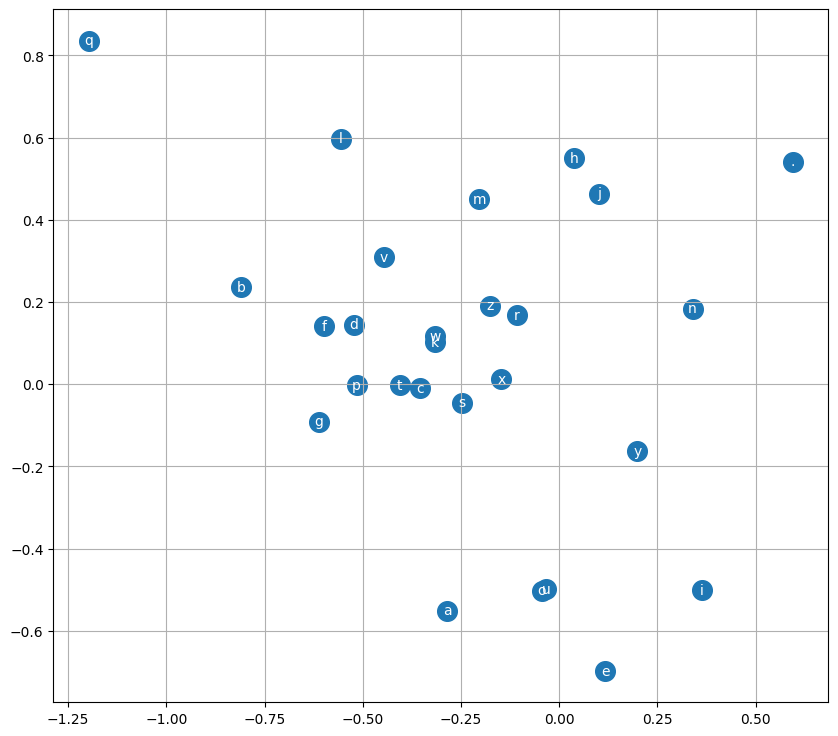

In [47]:
plt.figure(figsize=(10,9))
plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha='center',va='center',color='white')
plt.grid('minor')